**Grupo 26**

María Candelaria Arpajou

Gustavo Jaca

Hugo Alberto Folonier

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [5]:
import pandas as pd
datos    = boston['data']
columnas = boston['feature_names']
df = pd.DataFrame(datos, columns=columnas)
df = df.assign(MEDV=None)
df['MEDV'] = boston['target']
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**RESPUESTAS:**

1. El conjunto de datos trata del valor medio de las viviendas ocupadas por sus propietarios en miles de dólares de 506 casas en la ciudad de Boston en función de 13 atributos.


2. La variable objetivo que hay que predecir es MEDV, y es el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.


3. Hay 13 atributos posibles, los cuales estan en el vector boston['feature_names'] y son:

CRIM = Tasa de criminalidad per cápita por barrio.

ZN = Proporción de suelo residencial zonificado para lotes de más de 25000 pies cuadrados.

INDUS = Proporción de acres comerciales no minoristas por barrio.

CHAS = Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

NOX = Concentración de óxidos nítricos (partes por 10 millones).

RM = Promedio de cuartos por vivienda.

AGE = Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

DIS = Distancias ponderadas a cinco centros de empleo de Boston.

RAD = Índice de accesibilidad a carreteras radiales.

TAX = Impuesto a la propiedad de valor total por $10000.

PTRATIO = Proporción de alumnos por maestro por barrio.

B = 1000(Bk - 0.63)^2 donde Bk es la proporción de personas negras por barrio.

LSTAT = % estado más bajo de la población.


4. Tanto 'LSTAT' como 'RM' tienen las correlaciones más altas con valores absolutos muy similares. La correlación de 'LSTAT' es de -0.74, mientras que la correlación de 'RM' es de 0.70.


5. Se observa que el conjunto de datos posee una variable que indica la proporción de personas negras que viven en el barrio. Esta variable, de usarse para predecir el valor medio de las viviendas ocupadas por sus propietarios, puede establecer un importante sesgo racial. Por esa razón, pensamos que el data set puede ser utilizado para realizar predicciones siempre y cuando se elimine esta variable.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

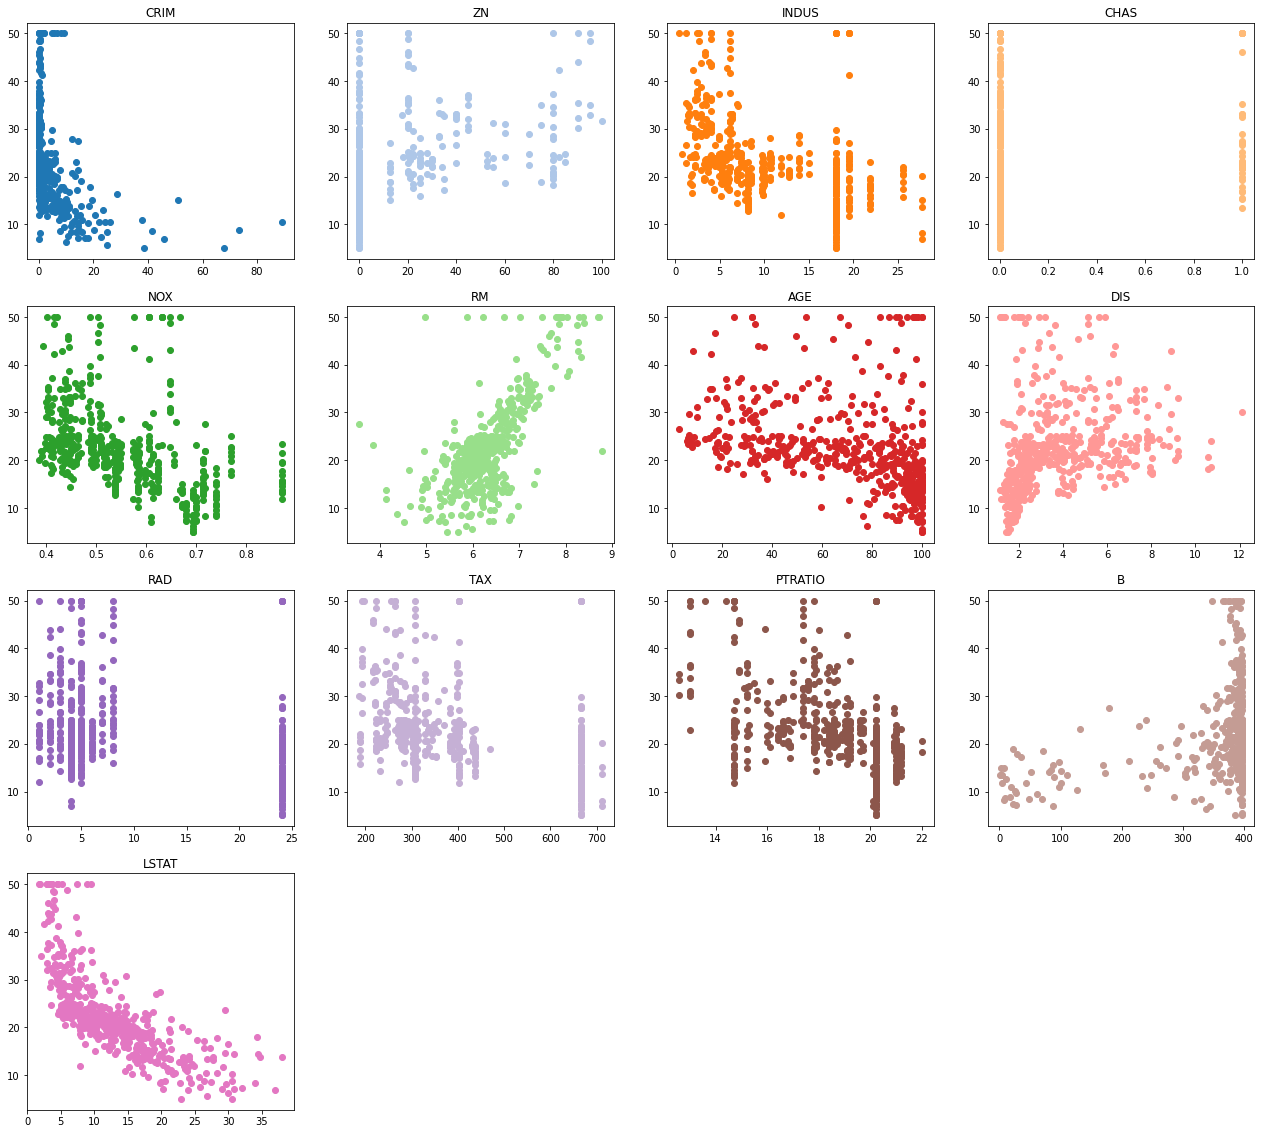

In [7]:
# 1.
fig = plt.figure(figsize=(22, 20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
colors = plt.get_cmap('tab20').colors

for id, feature, color in zip(range(len(boston['feature_names'])),boston['feature_names'],colors):
    mtx = fig.add_subplot(4, 4, id+1)
    mtx.title.set_text(feature)
    selector = (boston['feature_names'] == feature)
    mtx.scatter(X[:, selector], y, color=color)

**2 y 3.** A simple vista, las dos variables que parecen tener más información sobre la variable objetivo son **RM** y **LSTAT**.
En segundo orden de importancia podríamos listar las variables **NOX**, **AGE**, **INDUS** y **DIS**.

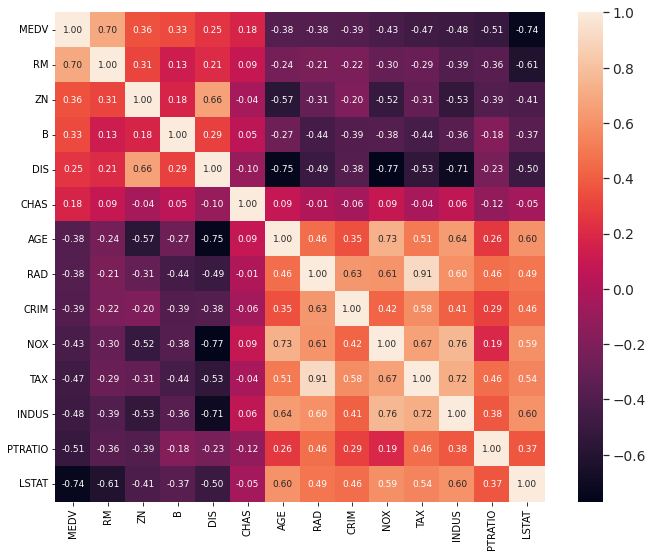

In [8]:
# 2. Se puede hacer un mapa de correlaciones y estudiar la fila MEDV. 
#    Las correlaciones más altas (en valor absoluto) serán las más interesantes de estudiar. 

import seaborn as sns
corrmat = df.corr()
k = 14 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = corrmat.nlargest(k, 'MEDV')['MEDV'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

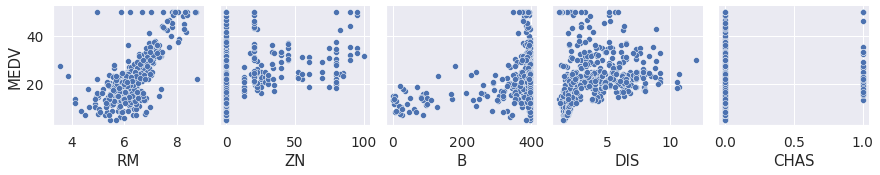

In [9]:
# Todas las variables con correlación positiva ordenadas decrecientemente
corr_pos = sns.pairplot(df,x_vars=['RM','ZN','B','DIS','CHAS'],y_vars=["MEDV"])

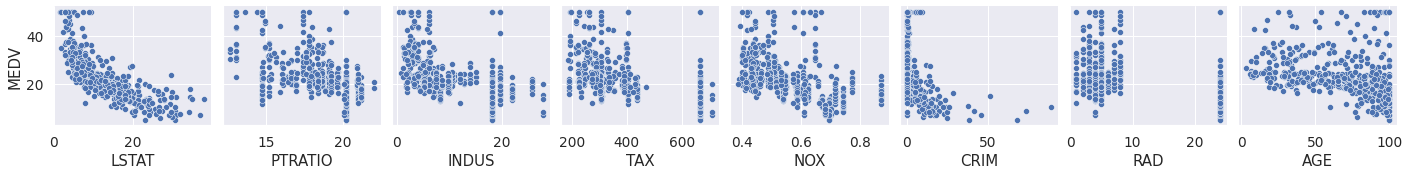

In [10]:
# Todas las variables con correlación negativas ordenadas crecientemente
corr_neg = sns.pairplot(df,x_vars=['LSTAT','PTRATIO','INDUS','TAX','NOX','CRIM','RAD','AGE'],y_vars=["MEDV"]) 

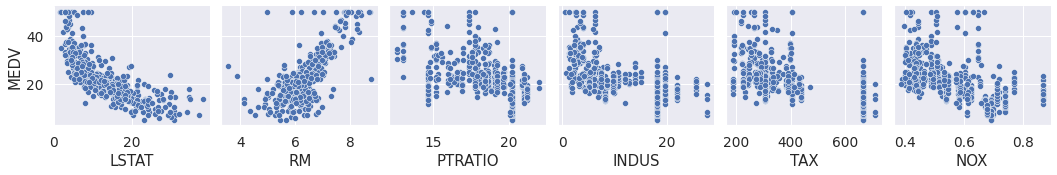

In [11]:
# 3. Los 5 atributos con mas altas correlaciones con MEDV, en orden de importancia, son:
atri_impo = sns.pairplot(df,x_vars=['LSTAT','RM','PTRATIO','INDUS','TAX','NOX'],y_vars=["MEDV"])

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [13]:
# 1. Selecciono un atributo:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f  = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [14]:
# 2. Instanciar y entrenar acá:
lr = linear_model.LinearRegression()
lr.fit(X_train_f,y_train)
wb = lr.intercept_
w1 = lr.coef_
w = np.append(wb,w1)
print(w)

[34.76519272 -0.95648761]


In [15]:
# 3. Predecir y evaluar acá.
y_train_pred = lr.predict(X_train_f)
y_test_pred  = lr.predict(X_test_f)

from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
test_error  = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

# Resultados con el atributo "LSTAT"
#Train error: 36.523966
#Test error: 46.336305

# Resultados con el atributo "RM"
#Train error: 42.820479
#Test error: 46.907352

# Resultados con el atributo "CRIM"
#Train error: 70.751856
#Test error: 76.386742

Train error: 36.523966
Test error: 46.336305


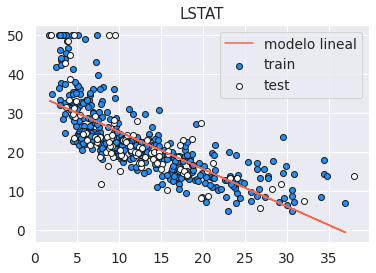

In [16]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(X_train_f, y_train_pred, color="tomato", label="modelo lineal")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

**5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.**

Si bien el atributo parece tener una correlación fuerte con la variable de estudio, el modelo de regresión lineal no predice correctamente en los extremos del muestreo. 

Probablemente con una regresión polinomial o de otro tipo ayude mejor a predecir los valores de test o de nuevas muestras.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [17]:
# 1. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns

feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f  = X_test[:, selector]

degrees = range(1,11)
err = []

for deg in degrees:
  pf = PolynomialFeatures(degree=deg,include_bias=False)
  X_train_pol = pf.fit_transform(X_train_f)
  X_test_pol = pf.fit_transform(X_test_f)
  lr = linear_model.LinearRegression()
  lr.fit(X_train_pol,y_train)
#  wb = lr.intercept_
#  w1 = lr.coef_
#  w = np.append(wb,w1)

  y_train_pred = lr.predict(X_train_pol)
  y_test_pred  = lr.predict(X_test_pol)

  train_error = mean_squared_error(y_train,y_train_pred)
  test_error  = mean_squared_error(y_test,y_test_pred)

  err.append([deg,train_error,test_error])

err_df = pd.DataFrame(err, columns =['Degree','Train Error','Test Error'])
err_df

,Degree,Train Error,Test Error
0,1,36.523966,46.336305
1,2,28.189172,38.846869
2,3,26.784846,37.224242
3,4,25.849433,34.704869
4,5,25.034963,34.834708
5,6,25.014028,34.326207
6,7,25.013535,34.261128
7,8,24.845823,36.414720
8,9,24.825724,34.878487
9,10,24.800687,41.983324


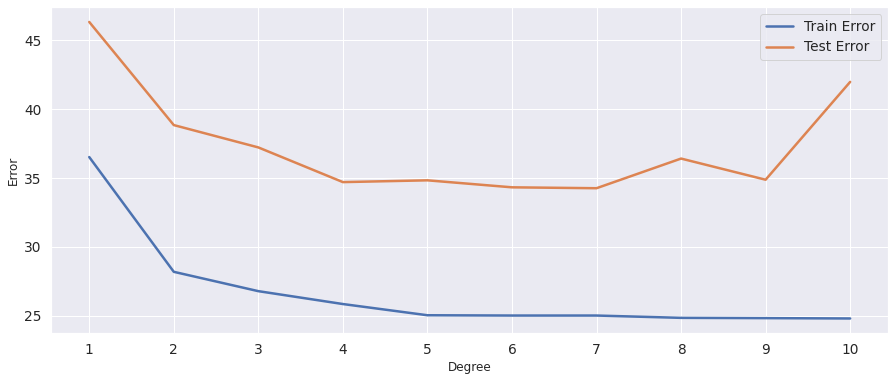

In [18]:
# 2. Graficar curvas de error acá.
fig=plt.figure(figsize=(15,6))

graph = sns.lineplot(data=err_df, x='Degree', y='Train Error', label='Train Error', linewidth=2.5)
sns.lineplot(data=err_df, x='Degree', y='Test Error', label='Test Error', linewidth=2.5)
graph.set_xlabel("Degree", fontsize = 12)
graph.set_ylabel("Error", fontsize = 12)
graph.set_xticks(range(1,11))
graph.set_xticklabels(range(1,11))
plt.show()

In [19]:
# 4. Reconstruir mejor modelo acá y graficar.
pf4 = PolynomialFeatures(degree=4,include_bias=False)
X_train_pol4 = pf4.fit_transform(X_train_f)
X_test_pol4 = pf4.fit_transform(X_test_f)
lr4 = linear_model.LinearRegression()
lr4.fit(X_train_pol4,y_train)
y_train_pred4 = lr4.predict(X_train_pol4)
y_test_pred4  = lr4.predict(X_test_pol4)

train_error = mean_squared_error(y_train, y_train_pred4)
test_error = mean_squared_error(y_test, y_test_pred4)
print(f'Polinomio de orden 4')
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

pf5 = PolynomialFeatures(degree=5,include_bias=False)
X_train_pol5 = pf5.fit_transform(X_train_f)
X_test_pol5 = pf5.fit_transform(X_test_f)
lr5 = linear_model.LinearRegression()
lr5.fit(X_train_pol5,y_train)
y_train_pred5 = lr5.predict(X_train_pol5)
y_test_pred5  = lr5.predict(X_test_pol5)

train_error = mean_squared_error(y_train, y_train_pred5)
test_error = mean_squared_error(y_test, y_test_pred5)
print(f'')
print(f'Polinomio de orden 5')
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

pf7 = PolynomialFeatures(degree=7,include_bias=False)
X_train_pol7 = pf7.fit_transform(X_train_f)
X_test_pol7 = pf7.fit_transform(X_test_f)
lr7 = linear_model.LinearRegression()
lr7.fit(X_train_pol7,y_train)
y_train_pred7 = lr7.predict(X_train_pol7)
y_test_pred7  = lr7.predict(X_test_pol7)

train_error = mean_squared_error(y_train, y_train_pred7)
test_error = mean_squared_error(y_test, y_test_pred7)
print(f'')
print(f'Polinomio de orden 7')
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Polinomio de orden 4
Train error: 25.849433
Test error: 34.704869

Polinomio de orden 5
Train error: 25.034963
Test error: 34.834708

Polinomio de orden 7
Train error: 25.013535
Test error: 34.261128


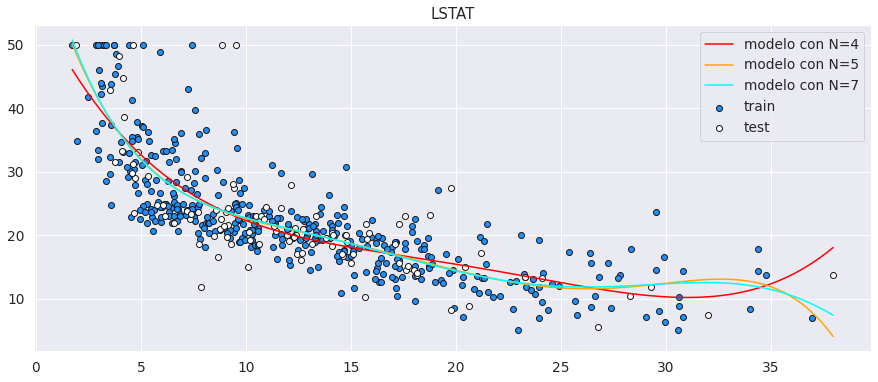

In [20]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
x4 = pf4.fit_transform(x)
x5 = pf5.fit_transform(x)
x7 = pf7.fit_transform(x)
fig=plt.figure(figsize=(15,6))
plt.plot(x, lr4.predict(x4), color="red", label="modelo con N=4")
plt.plot(x, lr5.predict(x5), color="orange", label="modelo con N=5")
plt.plot(x, lr7.predict(x7), color="cyan", label="modelo con N=7")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [21]:
from sklearn import linear_model

In [22]:
# 1. Resolver acá con dos atributos:
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
#X_train_fs.shape, X_test_fs.shape

In [23]:
# 2. Instanciar y entrenar acá:
lr = linear_model.LinearRegression()
lr.fit(X_train_fs,y_train)
wb = lr.intercept_
w1 = lr.coef_
w = np.append(wb,w1)
print(w)

[-1.26252868  5.10906846 -0.65494879]


In [24]:
# 3. Predecir y evaluar acá.
y_train_pred = lr.predict(X_train_fs)
y_test_pred  = lr.predict(X_test_fs)

from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
test_error  = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

# Resultados con el atributo "LSTAT"
# Train error: 36.523966
# Test error: 46.336305

# Resultados con el atributo "RM"
# Train error: 42.820479
# Test error: 46.907352

# Resultados con polinomio de orden 2
# Train error: 28.189172
# Test error: 38.846869

# Resultados con polinomio de orden 4
# Train error: 25.849433
# Test error: 34.704869

# Resultados con polinomio de orden 5
# Train error: 25.034963
# Test error: 34.834708

# Resultados con polinomio de orden 7
# Train error: 25.013535
# Test error: 34.261128

Train error: 28.790276
Test error: 37.383106


## Ejercicio 6: A Todo Feature (opcional)

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [25]:
# Ejercicio 6: A Todo Feature
from sklearn import linear_model

X_train_fs = X_train
X_test_fs  = X_test
lr = linear_model.LinearRegression()
lr.fit(X_train_fs,y_train)
wb = lr.intercept_
w1 = lr.coef_
w = np.append(wb,w1)
y_train_pred = lr.predict(X_train_fs)
y_test_pred  = lr.predict(X_test_fs)

from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

# Resultados con el atributo "LSTAT"
# Train error: 36.523966
# Test error: 46.336305

# Resultados con el atributo "RM"
# Train error: 42.820479
# Test error: 46.907352

# Resultados con polinomio de orden 2
# Train error: 28.189172
# Test error: 38.846869

# Resultados con polinomio de orden 4
# Train error: 25.849433
# Test error: 34.704869

# Resultados con polinomio de orden 5
# Train error: 25.034963
# Test error: 34.834708

# Resultados con polinomio de orden 7
# Train error: 25.013535
# Test error: 34.261128

# Resultados con regresión lineal con los atributos "LSTAT" y "RM"
# Train error: 28.790276
# Test error: 37.383106

Train error: 19.326470
Test error: 33.448980


Cuando utilizamos todas las features disponibles obtenemos que el error en el conjunto de entrenamiento cae hasta 19.3, un error bastante menor incluso para las regresiones polinomiales de orden 4 a 7. Sin embargo, el error en el conjunto de test se encuentra en valores similares a estas regresiones polinomiales. Esto podría deberse al hecho de que a pesar de que aumentar el número de features hace disminuir el error en el entrenamiento, no todas las features contribuyen de la misma forma. Cuando comparamos la regresión lineal con los atributos "LSTAT" y "RM" con una regresion polinomial de orden 2, estabamos utilizando las dos features con correlaciones más altas y además con valores similares. Esto no ocurre con el resto de las features. Como conclusión podríamos decir que, de igual manera que ocurre con las regresiones polinomiales de alto orden, hay que buscar un compromiso entre el número de atributos y una mejora en el error generado por el modelo.

## Ejercicio 7: Regularización (opcional)

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [26]:
# Ejercicio 7: Regularización
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

import numpy as np
import matplotlib.pyplot as plt

feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f  = X_test[:, selector]

In [27]:
n_alphas = 200
alphas = np.linspace(0,3, n_alphas)
#alphas = np.logspace(-10,0, n_alphas)
err = []
for a in alphas:
  pf = PolynomialFeatures(degree=7,include_bias=False)
  X_train_pol = pf.fit_transform(X_train_f)
  X_test_pol = pf.fit_transform(X_test_f)
#  lr = linear_model.LinearRegression()
  ridge = Ridge(alpha=a,solver='svd')
  ridge.fit(X_train_pol,y_train)

  y_train_pred = ridge.predict(X_train_pol)
  y_test_pred  = ridge.predict(X_test_pol)

  train_error = mean_squared_error(y_train,y_train_pred)
  test_error  = mean_squared_error(y_test,y_test_pred)
  err.append([a,train_error,test_error])

err_df = pd.DataFrame(err, columns =['Alpha','Train Error','Test Error'])
err_df

,Alpha,Train Error,Test Error
0,0.000000,25.013535,34.261128
1,0.015075,25.013685,34.246101
2,0.030151,25.014109,34.232553
3,0.045226,25.014770,34.220332
4,0.060302,25.015635,34.209304
...,...,...,...
195,2.939698,25.198802,34.244716
196,2.954774,25.199135,34.245201
197,2.969849,25.199466,34.245682
198,2.984925,25.199795,34.246161


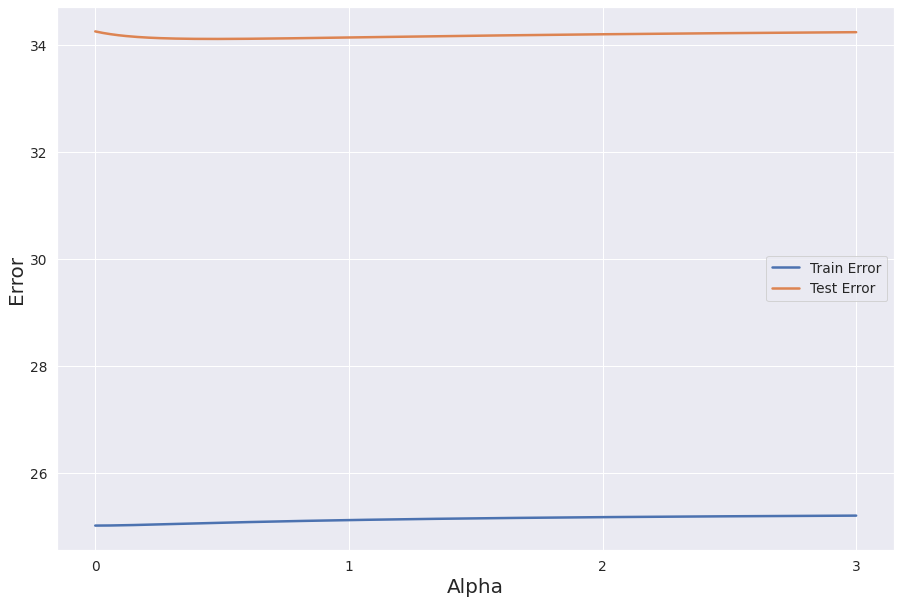

In [28]:
# 2. Graficar curvas de error acá.
fig=plt.figure(figsize=(15,10))

graph = sns.lineplot(data=err_df, x='Alpha', y='Train Error', label='Train Error', linewidth=2.5)
sns.lineplot(data=err_df, x='Alpha', y='Test Error', label='Test Error', linewidth=2.5)
graph.set_xlabel("Alpha", fontsize = 20)
graph.set_ylabel("Error", fontsize = 20)
graph.set_xticks(range(0,4))
graph.set_xticklabels(range(0,4))
plt.show()

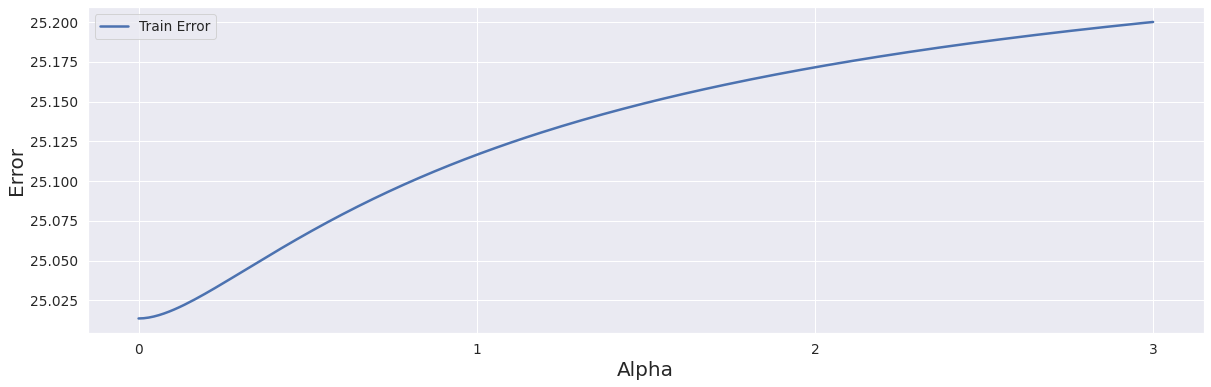

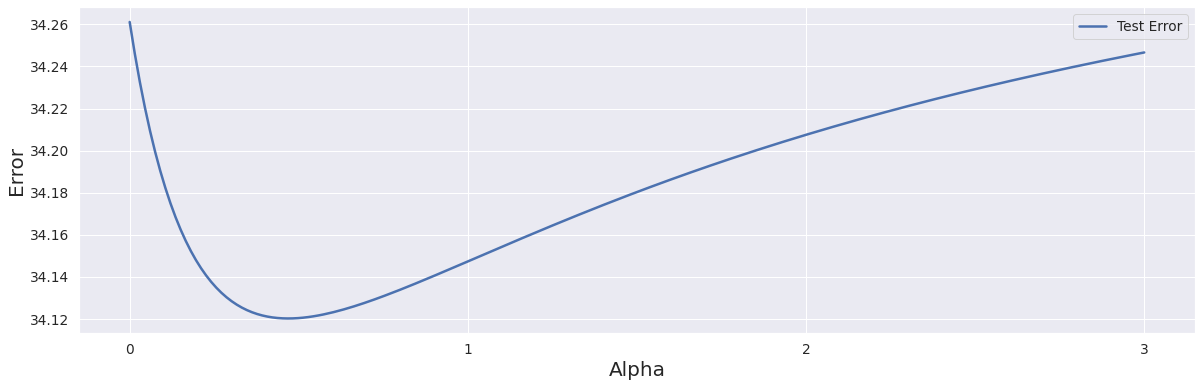

In [29]:
fig=plt.figure(figsize=(20,6))

graph = sns.lineplot(data=err_df, x='Alpha', y='Train Error', label='Train Error', linewidth=2.5)
graph.set_xlabel("Alpha", fontsize = 20)
graph.set_ylabel("Error", fontsize = 20)
graph.set_xticks(range(0,4))
graph.set_xticklabels(range(0,4))
plt.show()

fig=plt.figure(figsize=(20,6))

graph = sns.lineplot(data=err_df, x='Alpha', y='Test Error', label='Test Error', linewidth=2.5)
graph.set_xlabel("Alpha", fontsize = 20)
graph.set_ylabel("Error", fontsize = 20)
graph.set_xticks(range(0,4))
graph.set_xticklabels(range(0,4))
plt.show()

In [30]:
alf = 0.5
pf = PolynomialFeatures(degree=7,include_bias=False)
X_train_pol = pf.fit_transform(X_train_f)
X_test_pol = pf.fit_transform(X_test_f)
ridge = Ridge(alpha=alf,solver='svd')
ridge.fit(X_train_pol,y_train)

y_train_pred = ridge.predict(X_train_pol)
y_test_pred  = ridge.predict(X_test_pol)

train_error = mean_squared_error(y_train,y_train_pred)
test_error  = mean_squared_error(y_test,y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

# Resultados con el atributo "LSTAT"
# Train error: 36.523966
# Test error: 46.336305

# Resultados con el atributo "RM"
# Train error: 42.820479
# Test error: 46.907352

# Resultados con polinomio de orden 2
# Train error: 28.189172
# Test error: 38.846869

# Resultados con polinomio de orden 4
# Train error: 25.849433
# Test error: 34.704869

# Resultados con polinomio de orden 5
# Train error: 25.034963
# Test error: 34.834708

# Resultados con polinomio de orden 7
# Train error: 25.013535
# Test error: 34.261128

# Resultados con regresión lineal con los atributos "LSTAT" y "RM"
# Train error: 28.790276
# Test error: 37.383106

# A todo Feature
# Train error: 19.326470
# Test error: 33.448980

Train error: 25.067217
Test error: 34.120422


Para este caso, el ridge produce apenas una mejora del 0.4% respecto del polinomio de orden 7.

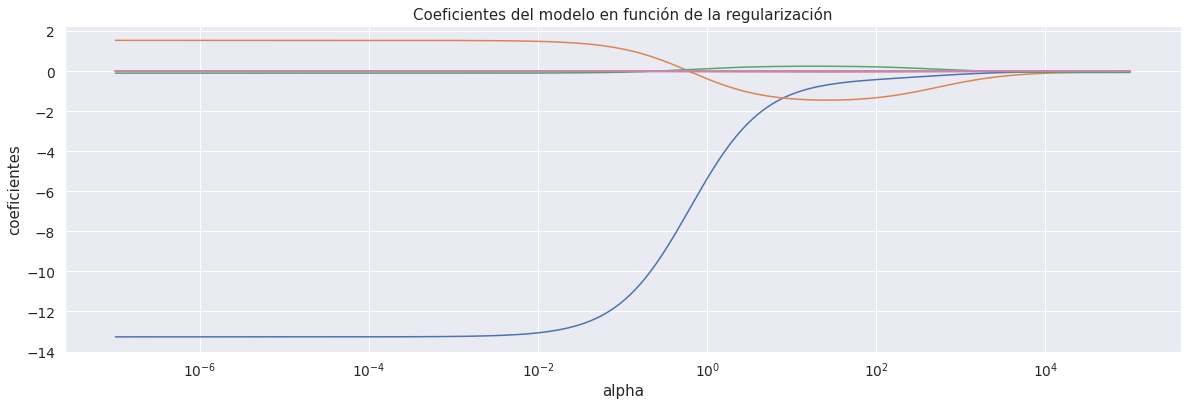

In [31]:
# Por ultimo, mostramos como los 7 parametros de la regresión polinomial caen a 
# valores cercanos a 0 a medida que aumenta el ridge.
 
n_alphas = 200
#alphas = np.linspace(0,3, n_alphas)
alphas = np.logspace(-7,5, n_alphas)
coefs = []
for a in alphas:
  pf = PolynomialFeatures(degree=7,include_bias=False)
  X_train_pol = pf.fit_transform(X_train_f)
  X_test_pol = pf.fit_transform(X_test_f)
  ridge = Ridge(alpha=a,solver='svd')
  model_temp = ridge.fit(X_train_pol,y_train)
  coefs.append(model_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()